In [38]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
#from datetime import datetime

In [39]:
df = pd.read_csv('Data1.csv')
print(df.head())
df=df.head(101)

         Date    Stock  liabilities      equity  total_assets  current_assets  \
0   7/31/2006  Stock 7   422.514661  539.842868    962.357528      748.161176   
1   8/31/2006  Stock 7   507.137519  849.394606   1356.532125      625.035435   
2   9/29/2006  Stock 7   344.752151  988.454596   1333.206747      408.626695   
3  10/31/2006  Stock 7   190.532021  270.587788    461.119809      323.591350   
4  11/30/2006  Stock 7   403.028192  168.146048    571.174240      446.153315   

   current_liabilities  total_revenue  net_income   dividend  \
0           933.586096     920.181287  283.520337  66.611984   
1           739.890344     996.658859  -44.460509   0.000000   
2           438.898113     300.694099  147.895066  37.697214   
3           280.416656     297.497428 -123.392043   0.000000   
4           443.719859     315.355044  -29.176649   0.000000   

   shares_outstanding       price  
0           1001203.0  100.000000  
1           1028478.0  101.273035  
2           1022597.

In [40]:
cols = list(df)[2:12]
print(cols)

['liabilities', 'equity', 'total_assets', 'current_assets', 'current_liabilities', 'total_revenue', 'net_income', 'dividend', 'shares_outstanding', 'price']


In [42]:
df_for_training = df[cols].astype(float)

In [43]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [44]:
trainX = []
trainY = []

In [45]:
n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 14 # Number of past days we want to use to predict the future.

In [46]:
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 9])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (87, 14, 10).
trainY shape == (87, 1).


In [47]:
df_for_training_scaled

array([[-0.34487022, -0.0376342 , -0.28174415, ...,  2.00895096,
        -1.84569042, -1.01598484],
       [-0.04245237,  1.15250511,  0.76309448, ..., -0.66549612,
        -0.8270868 , -0.68225061],
       [-0.62277116,  1.68715164,  0.7012659 , ...,  0.84803341,
        -1.04671679, -0.72920716],
       ...,
       [-1.45487677,  0.49691696, -0.73651926, ..., -0.66549612,
         1.69363506, -1.3481659 ],
       [ 0.77138078, -1.03817538, -0.14360922, ..., -0.29573669,
        -1.10609643, -1.56046355],
       [-1.28395656,  0.99357289, -0.26732996, ...,  1.9382655 ,
        -1.03050876, -1.572927  ]])

In [48]:
trainY

array([[-0.51108992],
       [-0.25840255],
       [-0.05205172],
       [-0.24029203],
       [-0.61572659],
       [-1.13262294],
       [-0.74350325],
       [-0.5364111 ],
       [-0.45470796],
       [-0.34902115],
       [-0.0572226 ],
       [ 0.29164027],
       [ 0.52727755],
       [ 0.71522372],
       [ 0.4229675 ],
       [ 0.18630131],
       [ 0.33455662],
       [ 0.27396008],
       [ 0.50816727],
       [ 0.96107817],
       [ 1.19509238],
       [ 1.61904536],
       [ 1.64887466],
       [ 1.38114735],
       [ 1.48848557],
       [ 1.66161561],
       [ 1.86978396],
       [ 2.13761983],
       [ 2.41494247],
       [ 2.20632512],
       [ 2.05161738],
       [ 1.84894251],
       [ 1.60623929],
       [ 1.81286587],
       [ 1.75702485],
       [ 1.61395421],
       [ 1.3031444 ],
       [ 1.45122865],
       [ 1.02018122],
       [ 0.51295073],
       [ 0.39588408],
       [ 0.55438238],
       [ 0.36389275],
       [ 0.13602547],
       [ 0.22088072],
       [ 0

In [49]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True)) 
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 14, 64)            19200     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 31,649
Trainable params: 31,649
Non-trainable params: 0
_________________________________________________________________


In [50]:
history = model.fit(trainX, trainY, epochs=5, batch_size=3, validation_split=0.1, verbose=1)

Epoch 1/5
26/26 [==============================] - 4s 23ms/step - loss: 0.6489 - val_loss: 1.3306
Epoch 2/5
26/26 [==============================] - 0s 10ms/step - loss: 0.3431 - val_loss: 0.7632
Epoch 3/5
26/26 [==============================] - 0s 12ms/step - loss: 0.2021 - val_loss: 0.2838
Epoch 4/5
26/26 [==============================] - 0s 10ms/step - loss: 0.0849 - val_loss: 0.2404
Epoch 5/5
26/26 [==============================] - 0s 10ms/step - loss: 0.0920 - val_loss: 0.1146


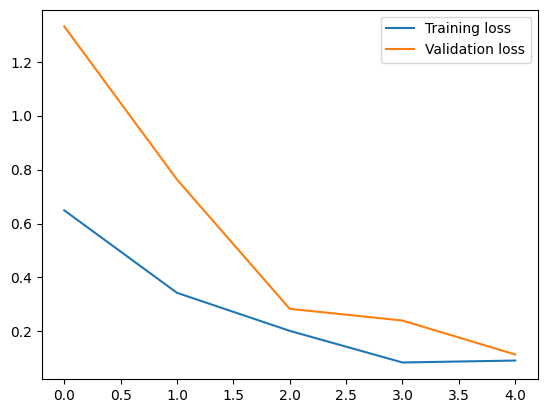

In [51]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [52]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

In [53]:
df2= df.head(150)
train_dates = pd.to_datetime(df2['Date'])
print(train_dates.tail(15)) 

86    2013-09-30
87    2013-10-31
88    2013-11-29
89    2013-12-31
90    2014-01-31
91    2014-02-28
92    2014-03-31
93    2014-04-30
94    2014-05-30
95    2014-06-30
96    2014-07-31
97    2014-08-29
98    2014-09-30
99    2014-10-31
100   2014-11-28
Name: Date, dtype: datetime64[ns]


In [54]:
n_past = 1
n_days_for_prediction=50  #let us predict past 15 days

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq='M').tolist()
print(predict_period_dates)

[Timestamp('2014-11-30 00:00:00', freq='M'), Timestamp('2014-12-31 00:00:00', freq='M'), Timestamp('2015-01-31 00:00:00', freq='M'), Timestamp('2015-02-28 00:00:00', freq='M'), Timestamp('2015-03-31 00:00:00', freq='M'), Timestamp('2015-04-30 00:00:00', freq='M'), Timestamp('2015-05-31 00:00:00', freq='M'), Timestamp('2015-06-30 00:00:00', freq='M'), Timestamp('2015-07-31 00:00:00', freq='M'), Timestamp('2015-08-31 00:00:00', freq='M'), Timestamp('2015-09-30 00:00:00', freq='M'), Timestamp('2015-10-31 00:00:00', freq='M'), Timestamp('2015-11-30 00:00:00', freq='M'), Timestamp('2015-12-31 00:00:00', freq='M'), Timestamp('2016-01-31 00:00:00', freq='M'), Timestamp('2016-02-29 00:00:00', freq='M'), Timestamp('2016-03-31 00:00:00', freq='M'), Timestamp('2016-04-30 00:00:00', freq='M'), Timestamp('2016-05-31 00:00:00', freq='M'), Timestamp('2016-06-30 00:00:00', freq='M'), Timestamp('2016-07-31 00:00:00', freq='M'), Timestamp('2016-08-31 00:00:00', freq='M'), Timestamp('2016-09-30 00:00:00'

In [55]:
prediction = model.predict(trainX[-n_days_for_prediction:]) 

2/2 [==============================] - 0s 8ms/step


In [56]:
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,9]

In [57]:
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'price':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

In [58]:
original = df[['Date', 'price']]
original['Date']=pd.to_datetime(original['Date'])
original


<ipython-input-58-20f60c629b61>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date']=pd.to_datetime(original['Date'])


,Date,price
0,2006-07-31,100.000000
1,2006-08-31,101.273035
2,2006-09-29,101.093919
3,2006-10-31,102.025162
4,2006-11-30,101.592716
...,...,...
96,2014-07-31,98.931232
97,2014-08-29,98.192423
98,2014-09-30,98.732889
99,2014-10-31,97.923076


In [59]:
df_forecast

,Date,price
0,2014-11-30,108.606621
1,2014-12-31,107.838676
2,2015-01-31,106.919350
3,2015-02-28,106.119621
4,2015-03-31,105.733162
5,2015-04-30,105.357506
6,2015-05-31,105.009254
7,2015-06-30,104.982346
8,2015-07-31,105.173302
9,2015-08-31,105.076340


<Axes: xlabel='Date'>

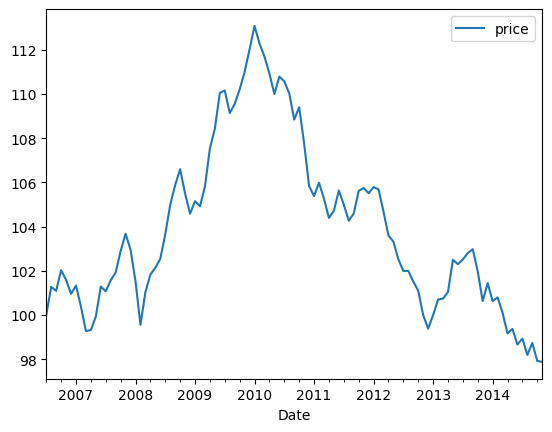

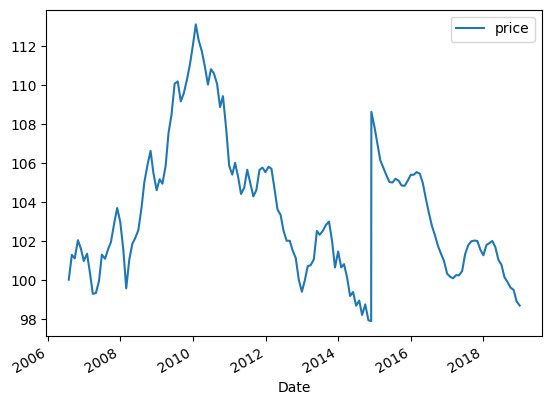

In [60]:
original.plot(x='Date',y='price')
original= pd.concat([original,df_forecast],axis=0)
original.plot(x='Date',y='price')
#f_forecast.plot(x='Date',y='price')


In [61]:
forcasted = df_forecast
forcasted_values = forcasted.loc[:,"price"]
forcasted_values = forcasted_values.tolist()
ABC = pd.read_csv('TrueData.csv')
TrueData = ABC.loc[:,"price"]
TrueData_values = TrueData.tolist()

a = len(TrueData_values)
eff = []
for i in range (0,a):
  b = 100 - ((abs(TrueData_values[i] - forcasted_values[i]))/TrueData_values[i])*100
  eff.append(b)
  
print(eff)

[90.14932306335534, 94.65083719866143, 95.51993991901689, 96.27262299223608, 96.62165938647034, 96.96032410655299, 97.27236785897674, 97.27013722983672, 97.05465565205833, 97.12095140962963, 97.33290464685439, 97.3231695285459, 97.044117801302, 96.71476937801248, 96.67672825445615, 96.51888848942515, 96.56524081616256, 97.00209304489172, 97.75801630587189, 98.44242810916198, 99.078466443452, 99.5273979686279, 99.96459102963227, 99.59412909214761, 99.25610509960342, 98.65194706898787, 98.52157905218303, 98.47060455452424, 98.65651270751557, 98.6807614611672, 98.91793347226357, 99.79655078094432, 99.71900245312301, 99.49426801451094, 99.42762133322431, 99.41977724112212, 99.82994409852536, 99.91049235343286, 99.53497733254329, 99.41809584060293, 99.27847633899307, 99.55838308220179, 99.82056120838857, 99.61027916477512, 98.9979192261428, 98.78140995218855, 98.52569034622292, 98.44054737518175, 97.88589225921321, 97.67214512259544]


In [62]:
avgeff = np.average(eff)
print(avgeff)

98.09426473331033
